# **모델 평가**

---
## 1. 평가 지표의 기본 개념
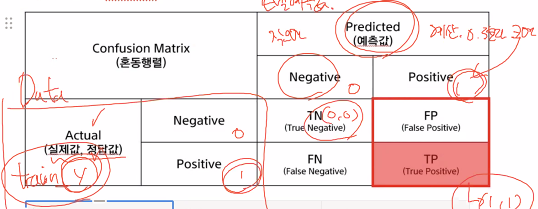

|용어|의미|수식|설명|
|---|---|---|---|
|**TP (True Positive)**|긍정인데 긍정으로 맞춤|—|모델이 맞게 예측한 긍정|
|**TN (True Negative)**|부정인데 부정으로 맞춤|—|모델이 맞게 예측한 부정|
|**FP (False Positive)**|부정인데 긍정으로 착각|—|“긍정이라 했지만 틀림”|
|**FN (False Negative)**|긍정인데 부정으로 착각|—|“놓친 긍정”|

---

### 🔹 주요 평가 지표

|지표|정의|해석|
|---|---|---|
|**Accuracy**|전체 중 맞춘 비율|`(TP + TN) / 전체`|
|**Precision (정밀도)**|“긍정이라고 예측한 것” 중 실제 긍정 비율|`TP / (TP + FP)`|
|**Recall (재현율)**|실제 긍정 중 모델이 맞춘 비율|`TP / (TP + FN)`|
|**F1-score**|Precision과 Recall의 조화평균|`2 * (P*R) / (P+R)`|

---

### 💡 쉽게 이해하기

|지표|실제 상황 예시|
|---|---|
|**Precision**|“긍정이라 말했을 때 얼마나 정확한가?” → **정확성 중심**|
|**Recall**|“실제 긍정을 얼마나 놓치지 않았는가?” → **민감도 중심**|
|**F1-score**|Precision과 Recall의 **균형 정도**|



In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import koreanize_matplotlib

reviews = [
    "배송이 빠르고 포장도 깔끔해요", "상품이 생각보다 별로예요", "가성비가 좋아요", "품질이 엉망이에요",
    "디자인이 예쁘고 마음에 들어요", "설명과 달라서 실망했어요", "매우 만족합니다", "포장이 너무 허술했어요",
    "소리가 깨끗하고 좋아요", "버튼이 잘 안눌러져요", "배송이 진짜 빨라요", "상품이 중고 같아요",
    "색상이 화면이랑 같아요", "전원버튼이 고장났어요", "가격대비 성능이 훌륭합니다", "하루만에 고장났어요",
    "아주 편하고 착용감이 좋아요", "냄새가 심해요", "생각보다 튼튼해요", "불량 제품이 왔어요",
    "포장도 예쁘고 선물용으로 좋아요", "사용법이 복잡해요", "배송상태 아주 양호합니다", "충전이 너무 느려요",
    "디자인 깔끔하고 고급져요", "플라스틱 냄새가 심합니다", "가벼워서 들고 다니기 좋아요", "설명서가 없어요",
    "이 가격에 이런 퀄리티라니 대박!", "한 번 쓰고 고장났어요", "배송상태 양호하고 만족해요", "불빛이 너무 약해요",
    "재질이 부드럽고 좋아요", "기대 이하입니다", "가격이 저렴하고 좋아요", "충전이 안돼요",
    "화면이 선명하고 깔끔해요", "배송이 느려서 아쉬워요", "설치가 간편해서 좋았어요", "소음이 심해요",
    "만족도가 높아요", "품질이 별로네요", "조립이 쉽고 편리합니다", "전선이 끊어져 있었어요",
    "사용감이 편하고 기능도 많아요", "불량품이 왔습니다", "포장 상태 아주 좋아요", "화면 깨짐이 있습니다",
    "배송도 빠르고 좋아요", "상품이 헐거워요", "정말 만족합니다", "충전단자가 안맞아요",
    "촉감이 부드럽고 좋아요", "사용 중 끊김이 있어요", "디자인이 심플하고 고급스러워요", "충전이 오래갑니다",
    "제품이 마음에 들어요", "버튼이 헐거워요", "배송 빠르고 상품도 좋아요", "전원 켜지지 않아요",
    "가볍고 사용하기 편해요", "플라스틱이 약해요", "색상 예쁘고 품질 좋아요", "불량이네요",
    "포장 깔끔하고 좋았어요", "설명과 같아요", "불빛이 깜빡거려요", "배송 진짜 빨라요",
    "가성비 최고입니다", "배터리가 빨리 닳아요", "화면 밝기가 적당해요", "소리가 너무 작아요",
    "디자인이 예뻐요", "스위치가 고장났어요", "가격도 착하고 품질도 좋아요", "설치가 어렵네요",
    "소리 깨끗하고 디자인 예뻐요", "선이 너무 짧아요", "상품이 튼튼하고 오래가요", "기계가 멈춰요",
    "배송 빠르고 좋아요", "냄새가 납니다", "감촉이 부드러워요", "버튼이 이상하게 눌러져요",
    "화질이 깔끔해요", "불량품이네요", "아주 만족스러워요", "사용하기 불편해요",
    "배송 정말 빨라요", "디자인 고급지고 예뻐요", "제품이 맘에 듭니다", "충전기 불량이에요",
    "소리가 선명해요", "색상 예쁘고 마음에 들어요", "상품 상태 좋아요", "전원이 꺼집니다",
    "배송 빠르고 포장도 좋았어요", "불빛이 약해요", "소음이 적고 좋아요", "버튼이 안돼요",
    "디자인 심플하고 깔끔해요", "불량제품 받았어요", "제품이 튼튼해요", "작동이 안돼요"
]

# 1(긍정), 0(부정) 반복 패턴으로 100개 생성
labels = [1 if i % 2 == 0 else 0 for i in range(len(reviews))]

# 데이터프레임 생성
df = pd.DataFrame({"text": reviews, "label": labels})


# 데이터 분리 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["label"], test_size=0.2, random_state=42
)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 모델 학습 (로지스틱 회귀)
model = LogisticRegression(C=2.0, max_iter=200)
model.fit(X_train_vec, y_train)

# 예측
y_pred = model.predict(X_test_vec)

# 나이브 베이즈 모델적용
from sklearn.naive_bayes import MultinomialNB


model2 = MultinomialNB(alpha=0.1)
model2.fit(X_train_vec, y_train)

y_pred2 = model2.predict(X_test_vec)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 로지스틱 회귀 결과
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred, target_names=["부정(0)", "긍정(1)"]))

# 나이브 베이즈 결과
print("=== Naive Bayes ===")
print(classification_report(y_test, model2.predict(X_test_vec), target_names=["부정(0)", "긍정(1)"]))



=== Logistic Regression ===
              precision    recall  f1-score   support

       부정(0)       0.80      0.80      0.80        10
       긍정(1)       0.82      0.82      0.82        11

    accuracy                           0.81        21
   macro avg       0.81      0.81      0.81        21
weighted avg       0.81      0.81      0.81        21

=== Naive Bayes ===
              precision    recall  f1-score   support

       부정(0)       0.80      0.80      0.80        10
       긍정(1)       0.82      0.82      0.82        11

    accuracy                           0.81        21
   macro avg       0.81      0.81      0.81        21
weighted avg       0.81      0.81      0.81        21



: 

---
## Confusion Matrix로 문제 진단하기

> 단순히 “정확도”가 낮다고 끝내지 말고,
> 
> **어떤 경우에 오답이 나는지** 확인하는 것이 중요합니다.

|오분류 유형|의미|개선 방향|
|---|---|---|
|**FP (False Positive)**|부정인데 긍정으로 잘못 예측|“긍정 단어가 섞인 문장” 구분 강화|
|**FN (False Negative)**|긍정인데 부정으로 잘못 예측|긍정 표현이 다양한 문장 보강|
|**둘 다 많음**|데이터/피처 불균형|데이터 수 보완 또는 하이퍼파라미터 조정|


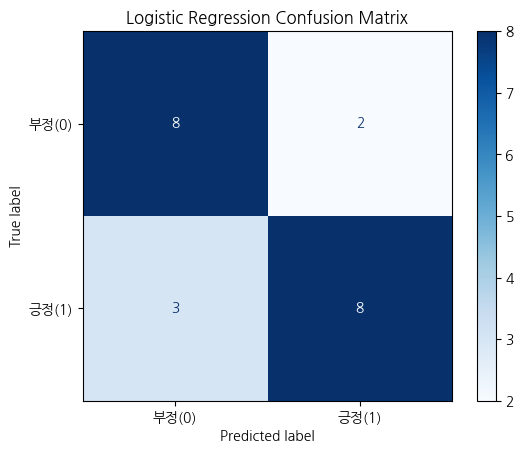

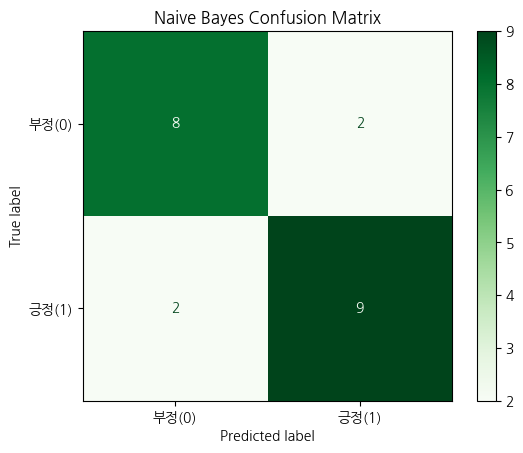

In [5]:
cm1 = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(cm1, display_labels=["부정(0)", "긍정(1)"])
disp1.plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# 혼동행렬 (나이브 베이즈)
cm2 = confusion_matrix(y_test, model2.predict(X_test_vec))
disp2 = ConfusionMatrixDisplay(cm2, display_labels=["부정(0)", "긍정(1)"])
disp2.plot(cmap="Greens")
plt.title("Naive Bayes Confusion Matrix")
plt.show()






## 모델 성능을 높이는 7가지 실전 Tip

| 구분                          | 개선 방법                                    | 설명 및 효과              |
| --------------------------- | ---------------------------------------- | -------------------- |
| **① 데이터 정제(Data Cleaning)** | 특수문자, 중복문장, 불필요 단어 제거                    | 노이즈 ↓ → 패턴이 더 명확     |
| **② 불용어(stopwords) 처리**     | “이”, “그”, “저”, “그리고” 등 의미 없는 단어 제거       | 중요 단어 가중치 ↑          |
| **③ n-gram 확장**             | `ngram_range=(1,2)` 또는 `(1,3)`           | “배송 빠르다” 같은 표현 단위 포착 |
| **④ TF-IDF 파라미터 조정**        | `max_features` (단어 수) 늘리기, `min_df` 조정   | 정보량 ↑, 희귀 단어 제거      |
| **⑤ 모델 하이퍼파라미터 튜닝**         | 나이브 베이즈 → `alpha`, 로지스틱 회귀 → `C`         | 과적합/과소적합 조절          |
| **⑥ 데이터 불균형 개선**            | 긍정/부정 비율이 다를 때 `class_weight='balanced'` | 학습 균형 유지             |
| **⑦ 학습 데이터 확장**             | 실제 리뷰 더 수집 or 증강                         | 모델 일반화 능력 ↑          |


**로지스틱 회귀 전용 Tip**
`model = LogisticRegression(C=2.0, max_iter=200)`

| C 값              | 의미    | 효과            |
| ---------------- | ----- | ------------- |
| **작음 (ex. 0.5)** | 규제 강함 | 과적합 방지, 단순 모델 |
| **큼 (ex. 2.0)**  | 규제 약함 | 복잡한 패턴 학습 가능  |

**나이브 베이즈 전용 Tip**
`model = MultinomialNB(alpha=0.5)`

| α 값          | 효과                         |
| ------------ | -------------------------- |
| **1.0 (기본)** | 안정적, 평균적인 성능               |
| **0.5**      | 드문 단어에 대한 영향 강화 (희귀 표현 반영) |
| **>1.0**     | 희귀 단어 영향 줄임 (더 일반화)        |

---
## 모델 성능을 높이는 방향

| 구분      | 기본 → 개선 방향                                |
| ------- | ----------------------------------------- |
| **전처리** | 불필요한 단어 제거, 한글 정제, 정규화                    |
| **특징화** | Count → TF-IDF → n-gram 확장                |
| **모델링** | 단순 모델(NB) → 복잡 모델(LogReg) 비교              |
| **튜닝**  | 하이퍼파라미터(`alpha`, `C`, `max_features`) 조정  |
| **평가**  | Accuracy → F1 중심 비교, Confusion Matrix로 진단 |